# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


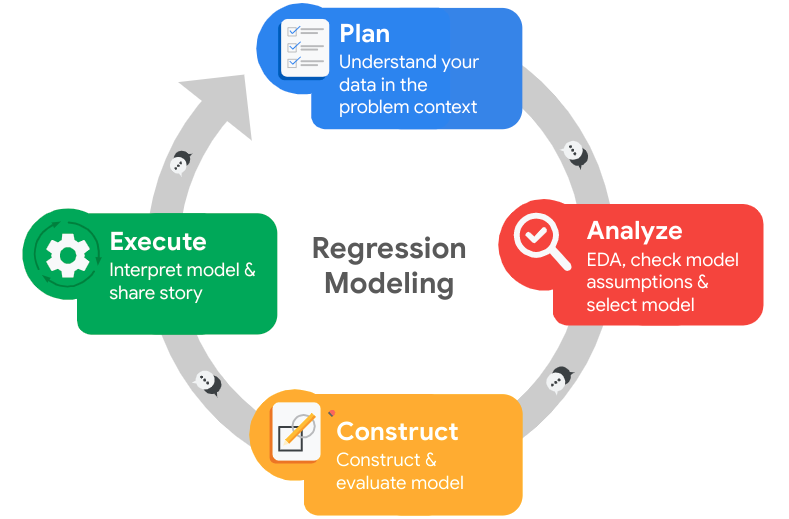

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?

    ○	Employers from Salifort
    
- What are you trying to solve or accomplish?

    ○	The goal is to reduce employee’s departures, and it is expected to find the main reasons for taking that decision.
    
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [5]:
# Import packages
### YOUR CODE HERE ### 

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Saving models
import pickle


In [6]:
# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [7]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [8]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

Rename the columns so they are easier to read and in an standard way

In [9]:
# Rename columns as needed
### YOUR CODE HERE ### 
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ### 
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
df0.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
df0.duplicated().sum()


3008

In [12]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(25)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

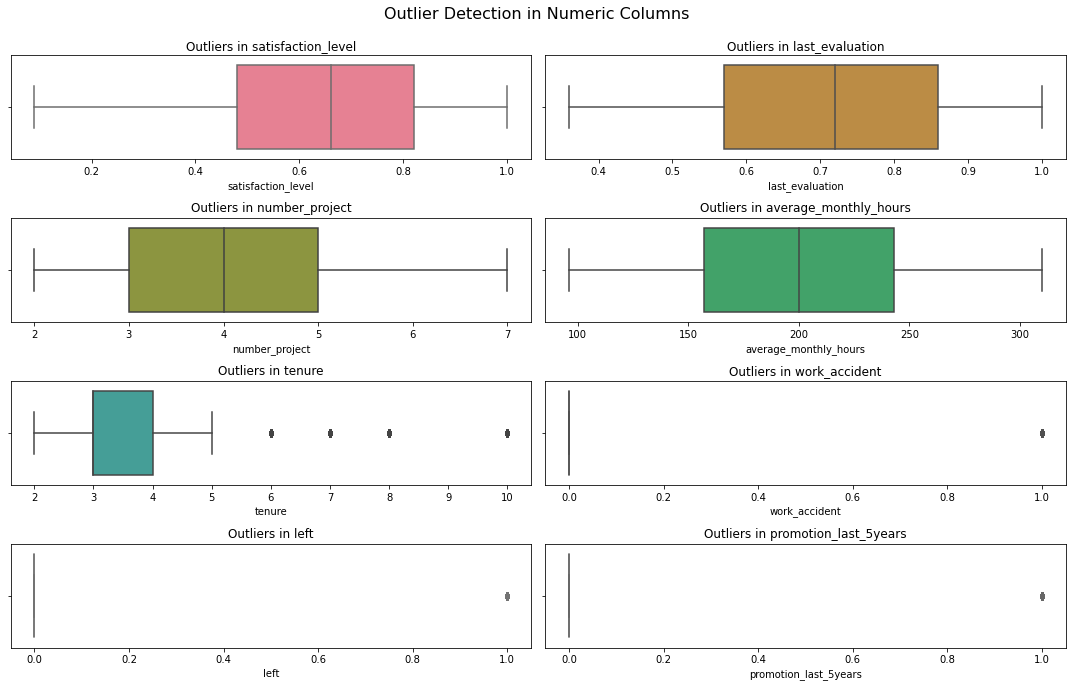

In [14]:
# Selecting numeric columns for outlier visualization
columns = df1.select_dtypes(include=['int64', 'float64']).columns
colors = sns.color_palette("husl", len(columns))  # Generate distinct colors

# Setting up a 2x3 grid for the boxplots
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
fig.suptitle("Outlier Detection in Numeric Columns", fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plotting each numeric column in a different color in a 2x3 grid
for i, column in enumerate(columns):
    sns.boxplot(x=df1[column], color=colors[i], ax=axes[i])
    axes[i].set_title(f"Outliers in {column}")

# Remove any unused subplots if there are fewer than 6 columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for title
plt.show()

In [15]:
# Determine the number of rows containing outliers
# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))



Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
df1['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

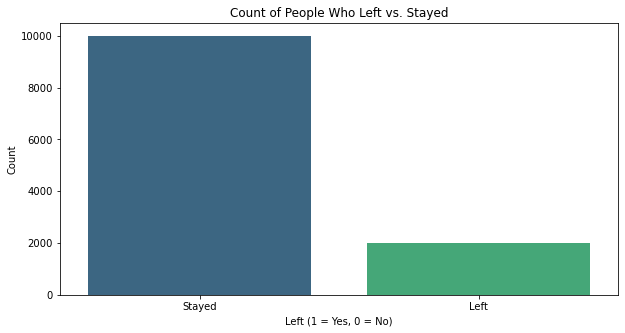

In [17]:
# Create a bar plot for counts
plt.figure(figsize=(10, 5))
sns.countplot(x='left', data=df1, palette='viridis')
plt.title('Count of People Who Left vs. Stayed')
plt.xlabel('Left (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'])
plt.show()

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

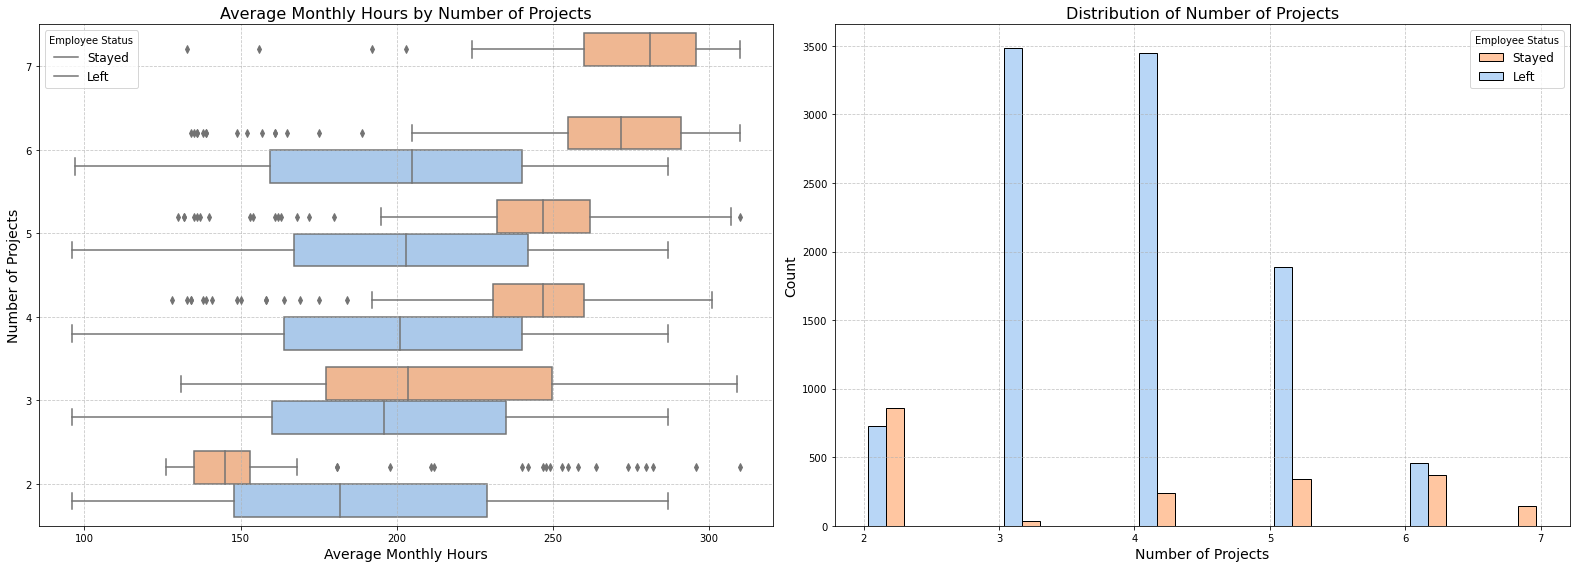

In [18]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create a boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0], palette='pastel')
ax[0].invert_yaxis()
ax[0].set_title('Average Monthly Hours by Number of Projects', fontsize=16)
ax[0].set_xlabel('Average Monthly Hours', fontsize=14)
ax[0].set_ylabel('Number of Projects', fontsize=14)
ax[0].legend(title='Employee Status', labels=['Stayed', 'Left'], fontsize=12)

# Create a histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=0.8, ax=ax[1], palette='pastel', bins=15)
ax[1].set_title('Distribution of Number of Projects', fontsize=16)
ax[1].set_xlabel('Number of Projects', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)
ax[1].legend(title='Employee Status', labels=['Stayed', 'Left'], fontsize=12)

# Add gridlines for better readability
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


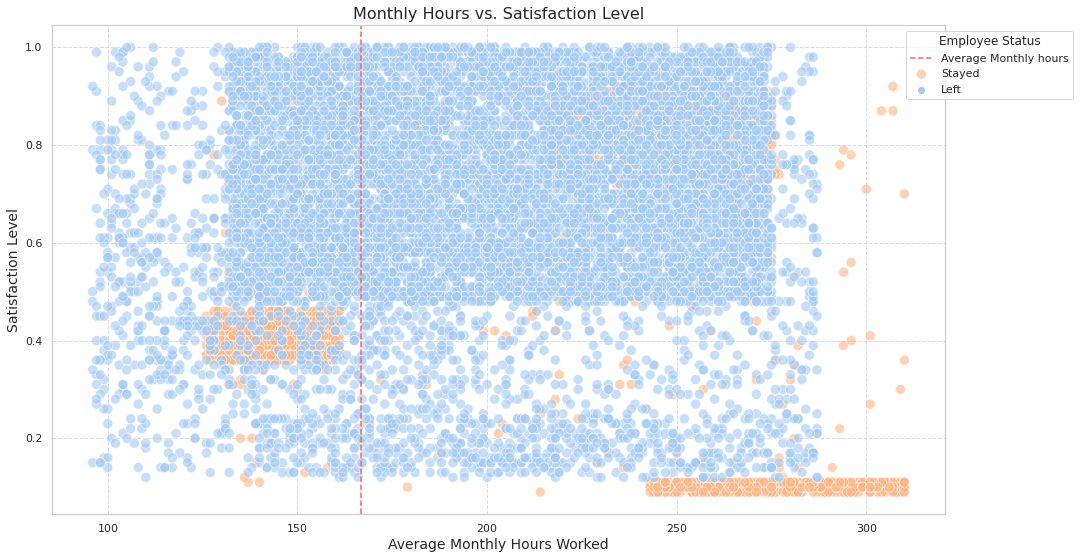

In [19]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create scatterplot
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.6, palette='pastel', s=100)

# Add vertical line for average working hours
plt.axvline(x=166.67, color='#ff6361', linestyle='--', label='166.67 hrs./mo.')

# Improve legend
plt.legend(title='Employee Status', labels=['Average Monthly hours','Stayed', 'Left'], loc='upper right', bbox_to_anchor=(1.15, 1))

# Add titles and labels
plt.title('Monthly Hours vs. Satisfaction Level', fontsize=16)
plt.xlabel('Average Monthly Hours Worked', fontsize=14)
plt.ylabel('Satisfaction Level', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

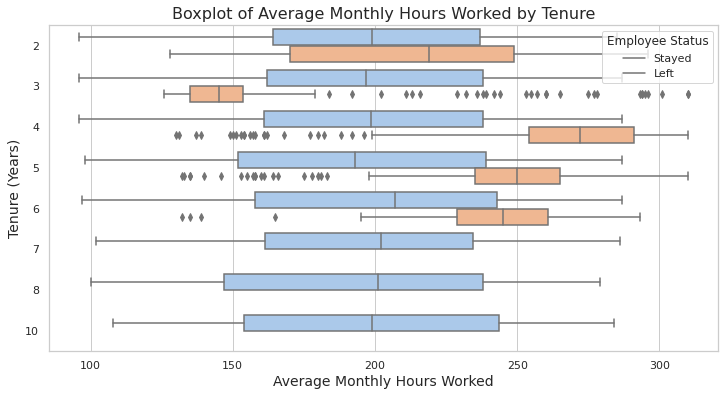

In [20]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create the horizontal boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, y='tenure', x='average_monthly_hours', hue='left', palette='pastel', orient='h')

# Set plot titles and labels
plt.title('Boxplot of Average Monthly Hours Worked by Tenure', fontsize=16)
plt.ylabel('Tenure (Years)', fontsize=14)
plt.xlabel('Average Monthly Hours Worked', fontsize=14)

# Reposition the legend outside the plot
plt.legend(title='Employee Status', labels=['Stayed', 'Left'], loc='upper right')

# Display the plot
plt.show()

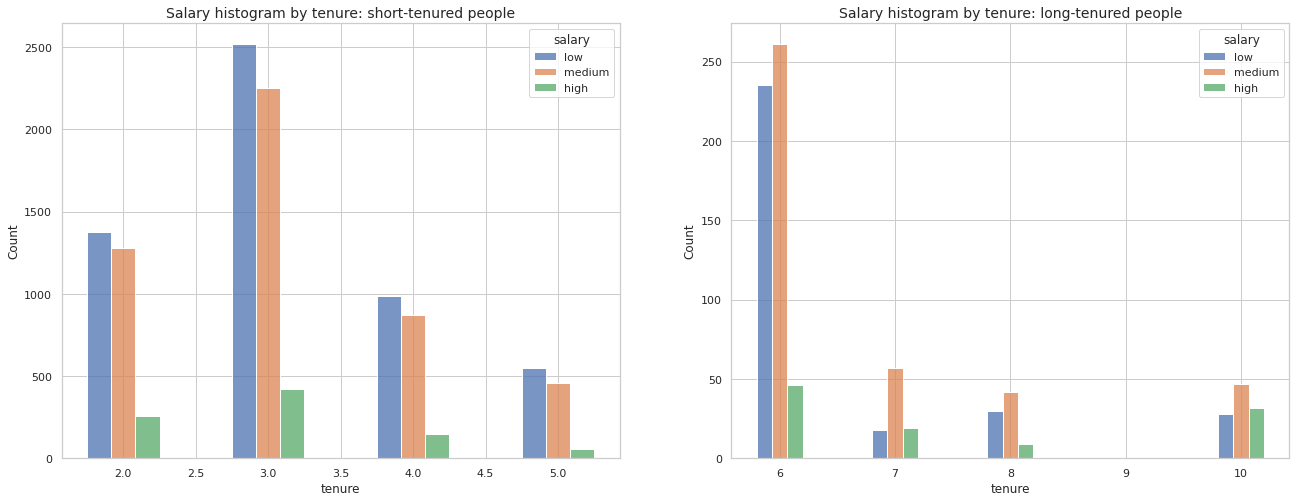

In [21]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] <= 5]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 5]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

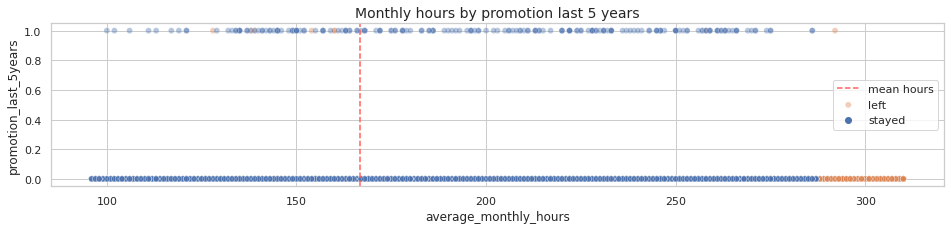

In [22]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['mean hours', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

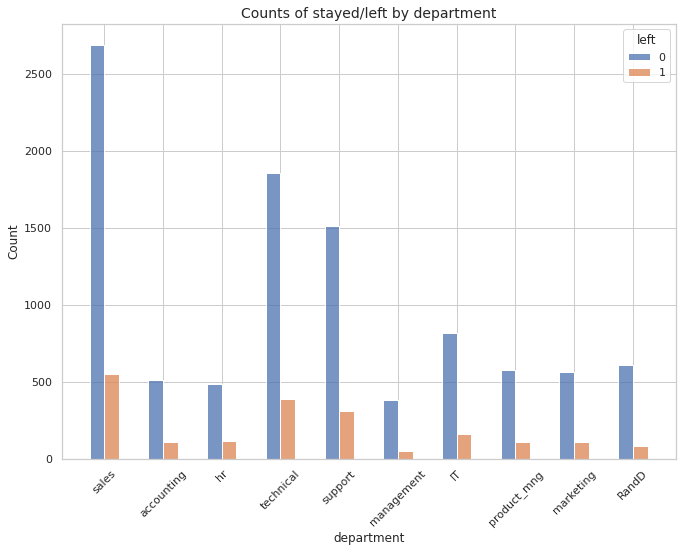

In [23]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);


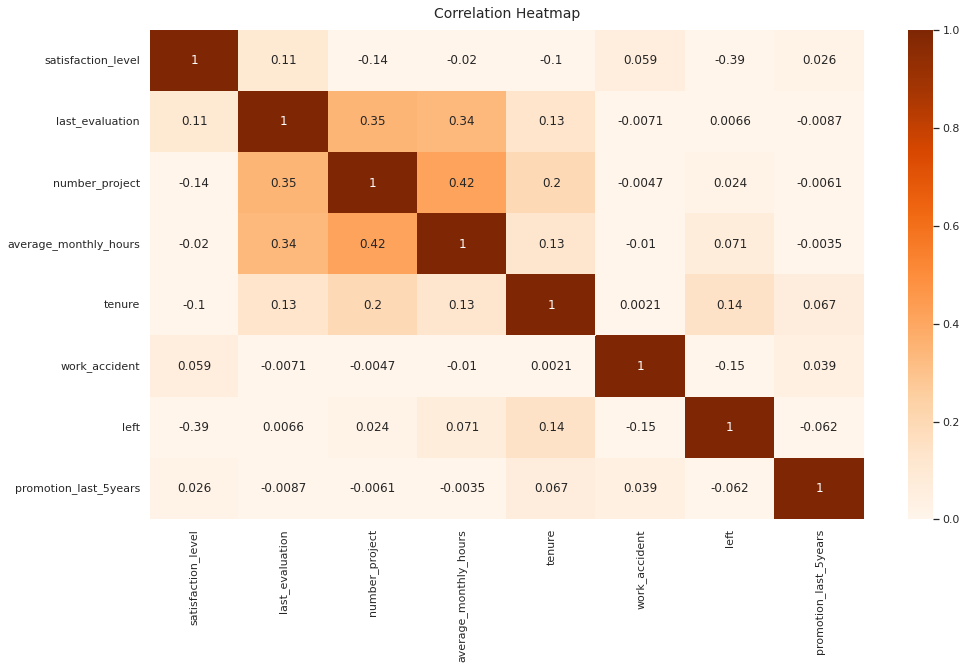

In [24]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=0, vmax=1, annot=True, cmap='Oranges')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

### Analysis of Project Work and Employee Turnover

The relationship between the number of projects employees work on and their average monthly hours reveals several noteworthy trends:

1. **Diverse Groups of Departed Employees**:
   - Among employees who left the company, two distinct groups can be identified:
     - **Group A**: Individuals who worked significantly fewer hours than their peers managing the same number of projects. This group could include employees who were either terminated or those who had already given their notice and were subsequently assigned reduced hours.
     - **Group B**: Employees in this category worked substantially longer hours. It’s reasonable to infer that these individuals were highly committed to their projects, potentially making them the primary contributors before their departure.

2. **High Project Load and Turnover**:
   - A striking observation is that every employee handling seven projects left the company. Moreover, the interquartile ranges for employees who left with six projects were approximately 255–295 hours per month, significantly higher than those in other categories.

3. **Optimal Project Range**:
   - The data suggests that the ideal number of projects for employees lies between three to four. The ratio of employees who left compared to those who stayed is notably low within this range, indicating better retention among these groups.

4. **Overwork Concerns**:
   - Assuming a standard work week of 40 hours and accounting for two weeks of vacation annually, the average working hours per month for employees working Monday through Friday equate to approximately 166.67 hours. This calculation highlights that, with the exception of employees managing only two projects, every other group—regardless of their retention status—consistently exceeded this average. The findings indicate that employees are likely overworked.


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [109]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


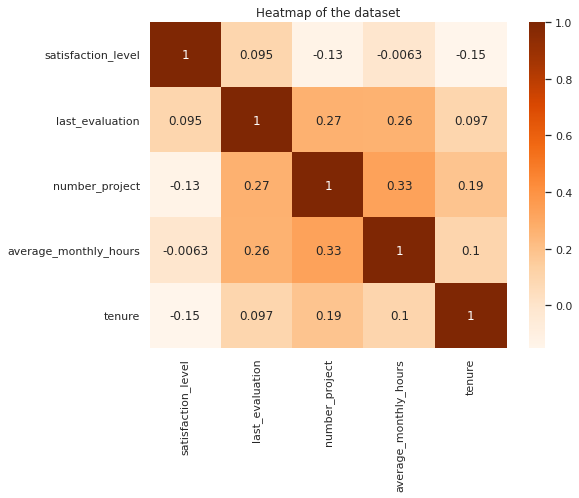

In [110]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="Oranges")
plt.title('Heatmap of the dataset')
plt.show()

In [111]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [112]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [113]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


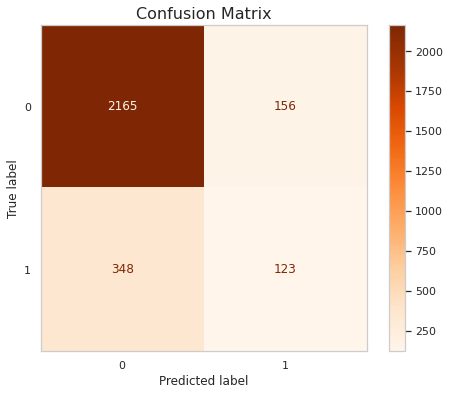

In [114]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix without grid and change color to orange
fig, ax = plt.subplots(figsize=(8, 6))  # Optional: Adjust figure size
log_disp.plot(values_format='', ax=ax, cmap='Oranges')

# Remove the grid
ax.grid(False)

# Display plot
plt.title('Confusion Matrix', fontsize=16)  # Add a title if needed
plt.show()

In [115]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [116]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



### Modeling Approach B: Tree-based Model
This approach covers implementation of Decision Tree and Random Forest. 

In [117]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [118]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.8 s, sys: 342 µs, total: 2.8 s
Wall time: 2.81 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [51]:
# Check best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [52]:
# Check best AUC score on CV
tree1.best_score_

0.9560592158774306

In [48]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [53]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.831453,0.902894,0.864811,0.952851,0.956059


#### Model Performance of Decision Trees

The scores obtained from the decision tree model indicate strong performance. High accuracy, precision, recall, and F1 scores suggest that the model effectively classifies instances in the dataset. However, it's important to acknowledge a common drawback of decision trees: **overfitting**. 

#### Overfitting in Decision Trees

Overfitting occurs when a model learns not only the underlying patterns in the training data but also the noise. This leads to poor generalization to unseen data. As a result, while a decision tree might perform exceptionally well on training data, its performance on validation or test data may be significantly worse.

#### Moving to Random Forests

To mitigate the risk of overfitting, we can construct a **random forest model**. Random forests improve upon decision trees by:

1. **Ensemble Learning**: By aggregating predictions from multiple decision trees, random forests create a more robust model.
2. **Feature Randomization**: Each tree in the forest is built using a random subset of the data and a random subset of features, which helps to ensure diversity among the trees.
3. **Reduced Overfitting**: The combination of predictions from multiple trees helps to smooth out noise, leading to better generalization on unseen data.

With these advantages, building a random forest model can provide improved performance and stability compared to a single decision tree. Let’s proceed to construct the random forest model to evaluate its effectiveness.


### Random Forest Classifier

In [35]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [36]:
%%time
rf1.fit(X_train, y_train) 

CPU times: user 8min 47s, sys: 10.3 s, total: 8min 58s
Wall time: 8min 58s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [42]:
# Define a path to the folder where you want to save the model
path = r'C:\Users\nitro\Desktop\Trabajos_ciencia_de_datos\prueba'

In [2]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [3]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

NameError: name 'path' is not defined

In [43]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [44]:
# Check best AUC score on CV
rf1.best_score_

0.9801962654493814

In [45]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [101]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.831453  0.902894  0.864811  0.952851  0.956059
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.968225  0.908588  0.937377  0.979583  0.980196


In [102]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [119]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.982063,0.929936,0.955289,0.985315,0.963245


## Feature Engineering

### Data Leakage and Feature Engineering

It's important to be cautious of high evaluation scores, as they might indicate data leakage. Data leakage occurs when information from the test set or unexpected future data is used during model training. This can artificially inflate the model's performance, leading to misleading results that aren't replicable in production.

In this case, certain variables like `satisfaction_level` might not be available when the model is deployed. Additionally, columns such as `average_monthly_hours` could be another source of leakage, as employees who are about to leave the company (or have been flagged for termination) may already be working fewer hours.

#### Adjustments to the Model:
- **Dropping `satisfaction_level`:** Since this variable may not be available at prediction time, we will exclude it from the model.
- **Creating a New Feature `overworked`:** A binary feature that indicates whether an employee is working excessive hours. This feature will help capture the workload's effect on the likelihood of quitting, without introducing leakage.

By implementing these changes, we aim to build more robust models that perform well in real-world applications, avoiding over-optimistic performance due to data leakage.

In [27]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


In [29]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [30]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [88]:
# Create test data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### Decision tree - Crossvalidated

In [89]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [90]:
%%time
tree2.fit(X_train1, y_train1)

CPU times: user 2.34 s, sys: 3.96 ms, total: 2.34 s
Wall time: 2.35 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [91]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [92]:
# Check best AUC score on CV
tree2.best_score_

0.9560592158774306

In [93]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.831453  0.902894  0.864811  0.952851  0.956059
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.831453  0.902894  0.864811  0.952851  0.956059


Para este caso particular cambiar la variable pudo no tener mucho impacto en el desempeño final del modelo

### Random forest CV

In [94]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [95]:
%%time
rf2.fit(X_train1, y_train1) 

CPU times: user 7min 9s, sys: 795 ms, total: 7min 10s
Wall time: 7min 10s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [96]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [97]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [98]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [68]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.831453  0.902894  0.864811  0.952851  0.956059
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.853053  0.886123  0.869057  0.955743  0.966792


In [71]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.868571,0.915663,0.891496,0.962975,0.944031


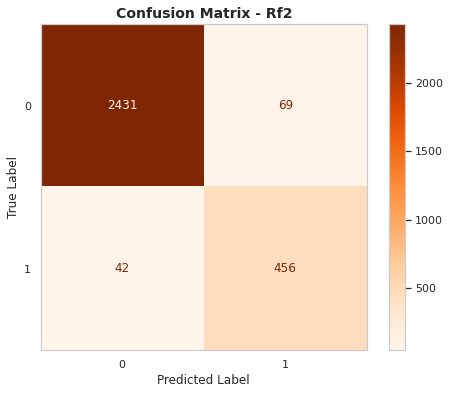

In [74]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Create a custom color map (shades of orange)
cmap = sns.color_palette("Oranges", as_cmap=True)

# Plot the confusion matrix with the new color map
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=cmap, values_format='')

# Customize plot title and labels
plt.title("Confusion Matrix - Rf2", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
# Remove grid from the plot
ax.grid(False)
# Show the plot
plt.show()

### Model Interpretation and Insights

The model shows a tendency to predict more false positives than false negatives. This means that the model is more likely to incorrectly flag an employee as at risk of quitting or being fired when, in fact, they are not. While this may lead to unnecessary interventions or concerns, it’s important to remember that false positives are often less critical than false negatives. In a business context, predicting an employee at risk (even when they aren’t) might allow the company to provide early support or take preventive actions.

However, this trend suggests a bias in the model's predictions that should be considered when making business decisions, particularly if the cost of false positives outweighs the benefit of early intervention.

### Further Exploratory Analysis

To gain deeper insights, it's useful to examine two key areas:

1. **Decision Tree Splits**:  
   By inspecting the splits of the decision tree model, you can observe how different features (e.g., job role, tenure, satisfaction level) influence the predictions at each node. This allows you to understand which factors the model is using to decide whether an employee is at risk of quitting or being fired, and where false positives might be occurring.

2. **Feature Importance in Random Forest**:  
   In the random forest model, understanding feature importance helps to identify the most influential variables contributing to the predictions. For example, features like satisfaction level, average monthly hours, and the number of projects may be highly predictive of an employee's risk status. This analysis can guide you in understanding what drives the model's predictions and focus on these factors in HR strategies.

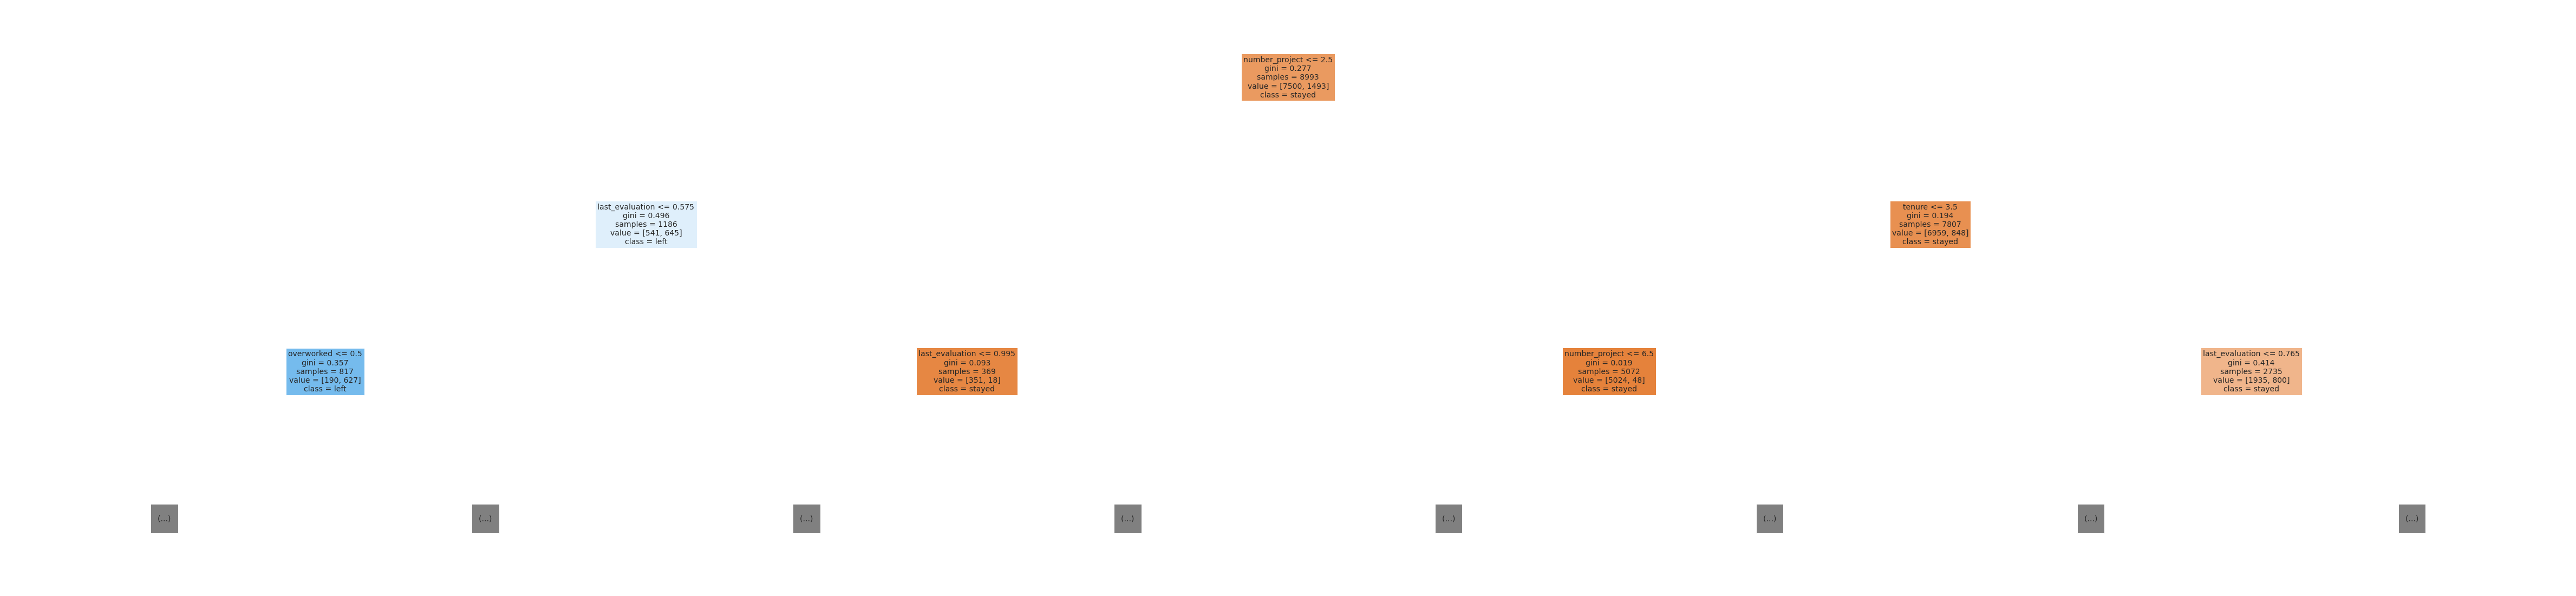

In [77]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [78]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.343930
last_evaluation,0.335089
tenure,0.213517
overworked,0.104462
salary,0.001610
department_technical,0.000630
department_sales,0.000434
department_support,0.000238
department_IT,0.000090


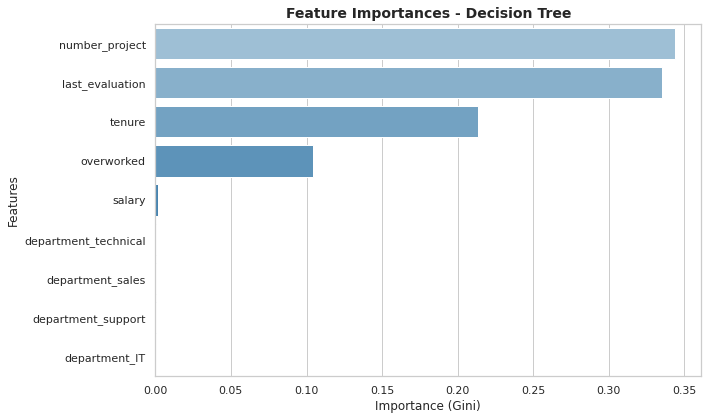

In [80]:
# Filter features with importance greater than 0
rf_importances_filtered = tree2_importances[tree2_importances["gini_importance"] > 0]

# Create the bar plot for feature importances using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importances_filtered, x="gini_importance", y=rf_importances_filtered.index, orient='h', palette="Blues_d")

# Add title and descriptive labels
plt.title("Feature Importances - Decision Tree", fontsize=14, fontweight="bold")
plt.ylabel("Features", fontsize=12)
plt.xlabel("Importance (Gini)", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

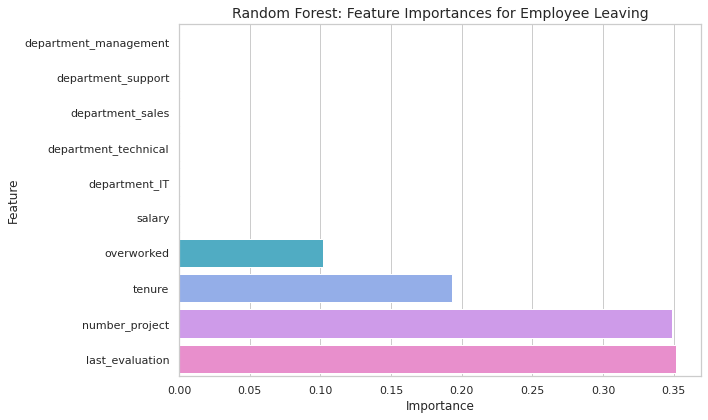

In [84]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")

# Set the color palette to Set2
sns.set_palette("Set2")

# Create the DataFrame for features and their importances
y_df = pd.DataFrame({"Feature": feat, "Importance": feat_impt})
y_sort_df = y_df.sort_values("Importance")

# Create the bar chart
fig = plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
ax1 = fig.add_subplot(111)

# Use a barplot from seaborn for better aesthetics
sns.barplot(data=y_sort_df, x="Importance", y="Feature", ax=ax1, hue='Feature', dodge=False)

# Set the title and labels
ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=14)
ax1.set_ylabel("Feature", fontsize=12)
ax1.set_xlabel("Importance", fontsize=12)

# Remove the legend
ax1.legend_.remove()

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






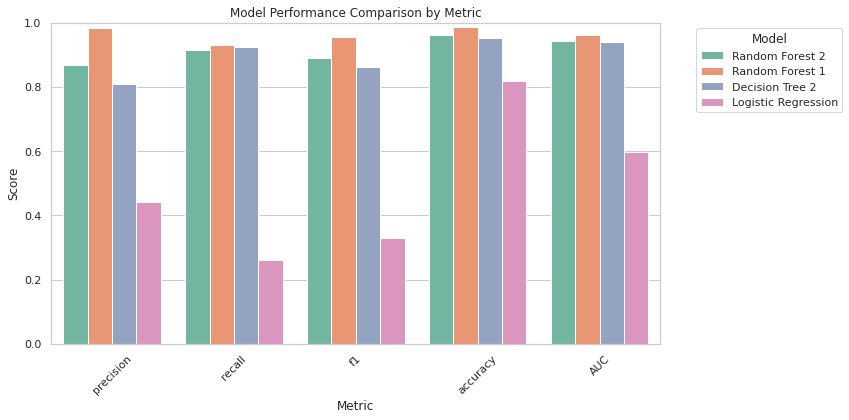

In [128]:
def get_scores1(model_name: str, model, X_test_data, y_test_data, test_set: str) -> pd.DataFrame:
    """
    Generate a table of test scores.

    Parameters: 
        model_name (str):  How you want your model to be named in the output table.
        model:              A fitted model (can be a GridSearchCV or other).
        X_test_data:        numpy array or pandas DataFrame of X_test data.
        y_test_data:        numpy array or pandas Series of y_test data.
        test_set (str):     Name of the test set for grouping in the output.

    Returns:
        pd.DataFrame: A DataFrame containing precision, recall, F1, accuracy, and AUC scores for the model.
    """
    
    # Check if the model is a GridSearchCV instance
    if hasattr(model, 'best_estimator_'):
        preds = model.best_estimator_.predict(X_test_data)
    else:
        preds = model.predict(X_test_data)  # For models like LogisticRegression

    # Calculate metrics
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    # Create a DataFrame for the scores
    table = pd.DataFrame({
        'model': [model_name],
        'test_set': [test_set],
        'precision': [precision], 
        'recall': [recall],
        'f1': [f1],
        'accuracy': [accuracy],
        'AUC': [auc]
    })

    return table

def get_all_model_scores():
    """
    Get scores for multiple models and plot the results.
    """
    scores_list = []

    # Gather scores for each model with appropriate test set names
    scores_list.append(get_scores1('Random Forest 2', rf2, X_test1, y_test1, 'Test Set 1'))
    scores_list.append(get_scores1('Random Forest 1', rf1, X_test, y_test, 'Test Set 2'))
    scores_list.append(get_scores1('Decision Tree 2', tree2, X_test1, y_test1, 'Test Set 1'))
    scores_list.append(get_scores1('Logistic Regression', log_clf, X_test, y_test, 'Test Set 2'))

    # Combine all scores into a single DataFrame
    models_scores = pd.concat(scores_list, ignore_index=True)

    # Plotting the results
    models_scores_melted = models_scores.melt(id_vars=['model', 'test_set'], 
                                                value_vars=['precision', 'recall', 'f1', 'accuracy', 'AUC'],
                                                var_name='metric', value_name='score')

    # Create a grouped bar plot by metrics
    plt.figure(figsize=(12, 6))
    bar_plot = sns.barplot(data=models_scores_melted, x='metric', y='score', hue='model', ci=None)
    bar_plot.set_title('Model Performance Comparison by Metric')
    plt.ylabel('Score')
    plt.xlabel('Metric')
    plt.ylim(0, 1)  # Assuming scores are between 0 and 1
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout for better fit
    plt.show()

# Call the function to get scores and plot results
get_all_model_scores()

The analysis of the classification models reveals that **Random Forest 1 (rf1)** outperforms all other models across key evaluation metrics, including precision, recall, F1 score, accuracy, and AUC. In contrast, **Logistic Regression** exhibited the least effective performance among the models tested.
 

💭
### Reflect on these questions as you complete the executing stage.

### Key Insights from the Models
- **Model Performance**: Random Forest 1 (rf1) demonstrated superior performance across all evaluated metrics, indicating its effectiveness in predicting employee departures compared to other models.
- **Feature Importance**: The analysis of feature importances highlighted specific factors that significantly influence employee retention, providing insights into what drives employee turnover.

### Business Recommendations
- **Focus on Key Factors**: Organizations should prioritize addressing the key factors identified by the model that contribute to employee turnover. For instance, if compensation or job satisfaction are pivotal, strategies can be implemented to enhance these areas.
- **Retention Strategies**: Develop targeted employee retention programs based on insights from the models to minimize turnover rates. This may include regular feedback mechanisms and tailored professional development opportunities.

### Recommendations for Management/Company
- **Data-Driven Decision Making**: Encourage the adoption of data-driven decision-making processes within the organization to proactively address potential employee turnover.
- **Regular Model Updates**: Implement a system for regularly updating and validating the models to ensure they reflect current trends and data patterns, facilitating more accurate predictions over time.

### Potential Model Improvements
- **Feature Engineering**: The model could potentially be improved by incorporating additional features that may not have been included initially, such as employee engagement scores or external market conditions.
- **Hyperparameter Tuning**: Further hyperparameter optimization could enhance model performance, ensuring it captures the underlying data patterns more effectively.

### Additional Questions for the Team
- **Segmentation Analysis**: Can we perform a segmentation analysis to understand turnover rates among different employee demographics (e.g., age, tenure, department)?
- **Predictive Maintenance**: What are the predictors of high performance in employees who stay longer, and how can this information be leveraged for recruitment and training?

### Resources Utilized
- **Scikit-Learn Documentation**: [Scikit-Learn](https://scikit-learn.org/stable/)
- **Pandas Documentation**: [Pandas](https://pandas.pydata.org/)
- **Matplotlib Documentation**: [Matplotlib](https://matplotlib.org/)
- **Seaborn Documentation**: [Seaborn](https://seaborn.pydata.org/)
- **Kaggle Datasets**: [Kaggle](https://www.kaggle.com/datasets) for potential additional datasets to enhance the analysis.

### Ethical Considerations
- **Data Privacy**: Ensure that employee data used for modeling complies with data privacy regulations and ethical standards. Employee identifiers should be anonymized to prevent misuse of sensitive information.
- **Bias Mitigation**: Be vigilant about potential biases in the model that may arise from imbalanced datasets, which could lead to unfair treatment of certain employee groups.



Double-click to enter your responses here.